# Basic Networks

The general procedure for creating a network is:

* Create one or more {py:obj}`Library <pynucastro.rates.library.Library>` objects containing the rates that you want.
  This can start with a list of nuclei or a list of rate names (like `"c12(a,g)o16"`).

  There are multiple sources of rates in pynucastro, so sometimes several libraries will be created,
  filtering the desired rates from the different sources.
  
* Remove any duplicate rates between the libraries.  Usually this means keeping tabulated rates over ReacLib rates, since the tabulated
  rates are more general.

* Rederive the inverse rates from ReacLib using detailed balance.

* Create a network using either {py:obj}`RateCollection <pynucastro.networks.rate_collection.RateCollection>` or one of the classes derived from it.

* Approximate some of the nuclei out of the network by introducing $(\alpha, p)(p,\gamma)$ or other rate approximations.

pynucastro gives you control over each of these steps, which is needed for some complex network types. But if you just want to create a network that has all possible links connecting a set of nuclei, then the
{py:func}`network_helper <pynucastro.networks.helper.network_helper>` function is enough.

Here's an example of a CNO network with some breakout.

In [1]:
import pynucastro as pyna

In [2]:
nuclei = ["p", "he4",
          "c12", "c13",
          "n13", "n14", "n15",
          "o14", "o15", "o16", "o17", "o18",
          "f17", "f18", "f19",
          "ne18", "ne19", "ne20", "ne21"]
net = pyna.network_helper(nuclei)

modifying N13 ⟶ p + C12 from C12 + p ⟶ N13 + 𝛾
modifying N14 ⟶ p + C13 from C13 + p ⟶ N14 + 𝛾
modifying O14 ⟶ p + N13 from N13 + p ⟶ O14 + 𝛾
modifying O15 ⟶ p + N14 from N14 + p ⟶ O15 + 𝛾
modifying O16 ⟶ p + N15 from N15 + p ⟶ O16 + 𝛾
modifying O16 ⟶ He4 + C12 from C12 + He4 ⟶ O16 + 𝛾
modifying F17 ⟶ p + O16 from O16 + p ⟶ F17 + 𝛾
modifying F18 ⟶ p + O17 from O17 + p ⟶ F18 + 𝛾
modifying F18 ⟶ He4 + N14 from N14 + He4 ⟶ F18 + 𝛾
modifying F19 ⟶ p + O18 from O18 + p ⟶ F19 + 𝛾
modifying F19 ⟶ He4 + N15 from N15 + He4 ⟶ F19 + 𝛾
modifying Ne18 ⟶ p + F17 from F17 + p ⟶ Ne18 + 𝛾
modifying Ne18 ⟶ He4 + O14 from O14 + He4 ⟶ Ne18 + 𝛾
modifying Ne19 ⟶ p + F18 from F18 + p ⟶ Ne19 + 𝛾
modifying Ne19 ⟶ He4 + O15 from O15 + He4 ⟶ Ne19 + 𝛾
modifying Ne20 ⟶ p + F19 from F19 + p ⟶ Ne20 + 𝛾
modifying Ne20 ⟶ He4 + O16 from O16 + He4 ⟶ Ne20 + 𝛾
modifying Ne21 ⟶ He4 + O17 from O17 + He4 ⟶ Ne21 + 𝛾
modifying C12 ⟶ 3 He4 from 3 He4 ⟶ C12 + 𝛾
modifying C12 + He4 ⟶ p + N15 from N15 + p ⟶ He4 + C12
modifying N14 

```{tip}
By default, `network_helper` will create a {py:obj}`PythonNetwork <pynucastro.networks.python_network.PythonNetwork>`, but
this can be changed via the `network_type` argument.
```

In [3]:
type(net)

pynucastro.networks.python_network.PythonNetwork

By default, `network_helper` will look at both {py:obj}`ReacLibLibrary <pynucastro.rates.library.ReacLibLibrary>` and {py:obj}`TabularLibrary <pynucastro.rates.library.TabularLibrary>` to find rates.  The warnings we see above about not being able to link nuclei are from the `TabularLibrary`, since those nuclei do not have tabulated weak rates.

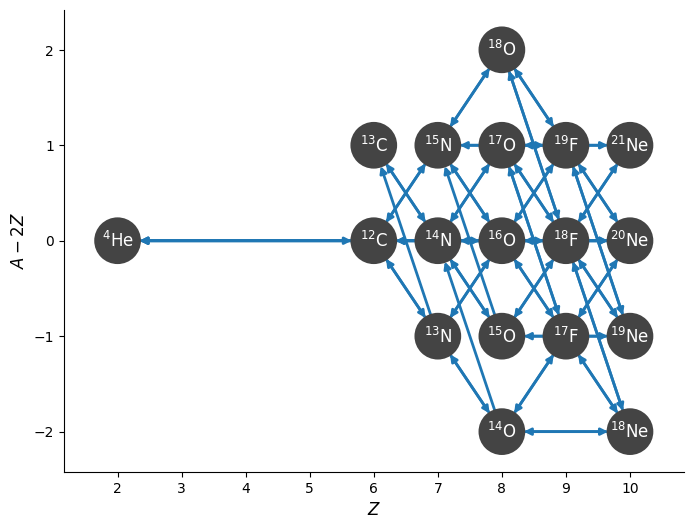

In [4]:
fig = net.plot(rotated=True, hide_xalpha=True)

We can see that it is using some tabulated weak rates for some links:

In [5]:
net.summary()

Network summary
---------------
  explicitly carried nuclei: 19
  approximated-out nuclei: 0
  inert nuclei (included in carried): 0

  total number of rates: 69

  rates explicitly connecting nuclei: 69
  hidden rates: 0

  reaclib rates: 32
  tabular rates: 8
  approximate rates: 0
  derived rates: 29
  modified rates: 0
  custom rates: 0


We can highlight these weak rates in the plot

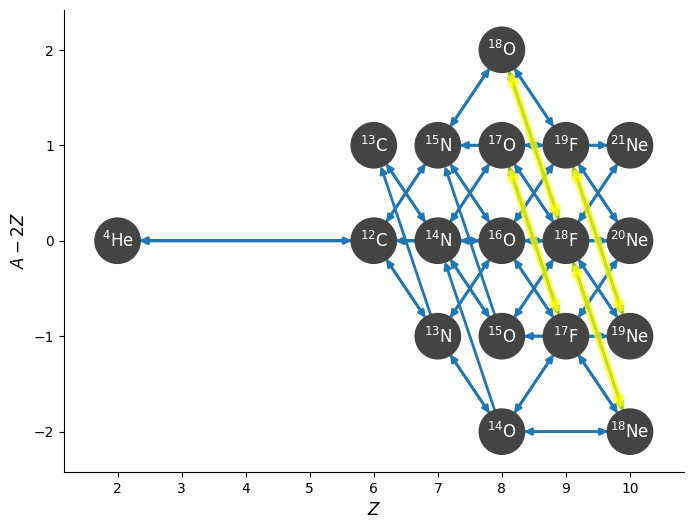

In [6]:
fig = net.plot(rotated=True, hide_xalpha=True,
               highlight_filter_function=lambda r: isinstance(r, pyna.rates.TabularRate))

Also notice that `network_helper` includes both the forward and reverse rates for all links. 

The notebooks following show how to have finer control when creating a network, allowing you to manually filter rates from libraries, remove duplicates, compute reverse rates, and introduce approximations.